In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 18, 12

In [3]:
N = 1024*1024
n_bins = 32

In [4]:
dist = np.random.uniform(0.0, 1.0, size=(N,2))#0.5, scale=0.1, size=(N, 2))
normal = np.random.normal(0.5, scale = 0.1, size= (N, 2))
print(dist.min(axis=0), dist.max(axis=0))
dist -= dist.min(axis=0)
dist /= dist.ptp(axis=0)
print(dist.min(axis=0), dist.max(axis=0))

[  1.08113093e-06   1.25550479e-06] [ 0.9999996   0.99999795]
[ 0.  0.] [ 1.  1.]


In [5]:
# Let's normalize somehow to make the plot appear different; we'll do this in x
vals_x, bins_x = np.histogram(dist[:,0], bins=n_bins, range = [0.0, 1.0])
vals_y, bins_y = np.histogram(dist[:,1], bins=n_bins, range = [0.0, 1.0])
vals_xy, bins_xy_x, bins_xy_y = np.histogram2d(dist[:,0], dist[:,1], bins = n_bins, range = [[0.0, 1.0], [0.0, 1.0]])

In [6]:
vals_xy.sum() / dist.shape[0]

1.0

In [7]:
(vals_xy == 0.0).sum() / vals_xy.size

0.0

In [8]:
dig_x = np.digitize(dist[:,0], bins = bins_x)
dig_y = np.digitize(dist[:,1], bins = bins_y)
dig_xy_x = np.digitize(dist[:,0], bins = bins_xy_x)
dig_xy_y = np.digitize(dist[:,1], bins = bins_xy_y)
weights_x = np.zeros(N)
weights_y = np.zeros(N)
weights_xy_x = np.zeros(N)
weights_xy_y = np.zeros(N)
weights_xy_normal = np.zeros(N)
for bin_id in range(n_bins):
    weights_x[dig_x == bin_id] = bins_x[bin_id] / vals_x[bin_id].sum()
    weights_y[dig_y == bin_id] = bins_y[bin_id] / vals_y[bin_id].sum()
    for bin_id2 in range(n_bins):
        weights_xy_x[ (dig_xy_x == bin_id) & (dig_xy_y == bin_id2) ] = \
            bins_xy_x[bin_id]/(vals_xy[bin_id, bin_id2].sum())
        weights_xy_y[ (dig_xy_x == bin_id) & (dig_xy_y == bin_id2) ] = \
            bins_xy_y[bin_id2]/(vals_xy[bin_id, bin_id2].sum())
        weights_xy_normal[ (dig_xy_x == bin_id) & (dig_xy_y == bin_id2) ] = \
            np.sqrt(((bins_xy_x[bin_id] - 0.5)**2 + bins_xy_y[bin_id2]-0.5)**2)/(vals_xy[bin_id, bin_id2].sum())            

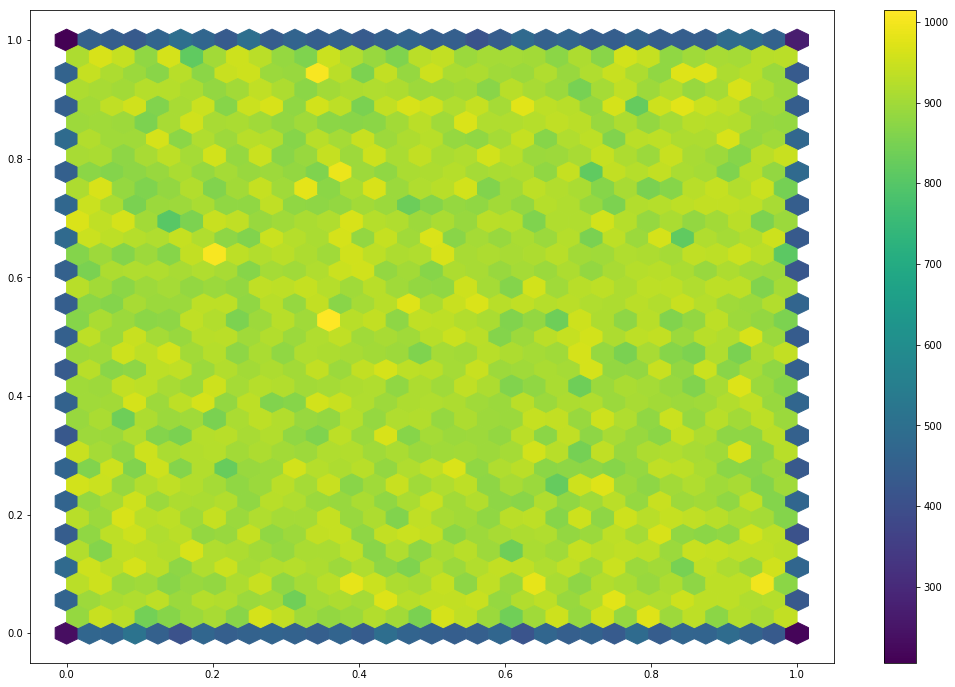

In [9]:
plt.hexbin(dist[:,0], dist[:,1], gridsize=n_bins, extent = [0.0, 1.0, 0.0, 1.0])
plt.colorbar();

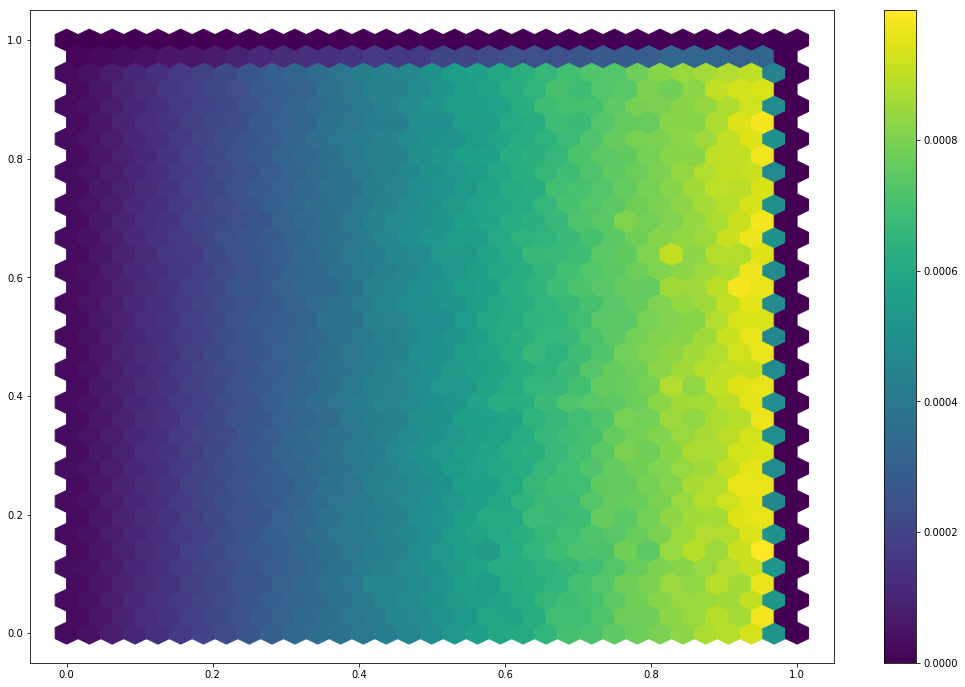

In [10]:
plt.hexbin(dist[:,0], dist[:,1], weights_xy_x, gridsize=n_bins, extent = [0.0, 1.0, 0.0, 1.0])
plt.colorbar();

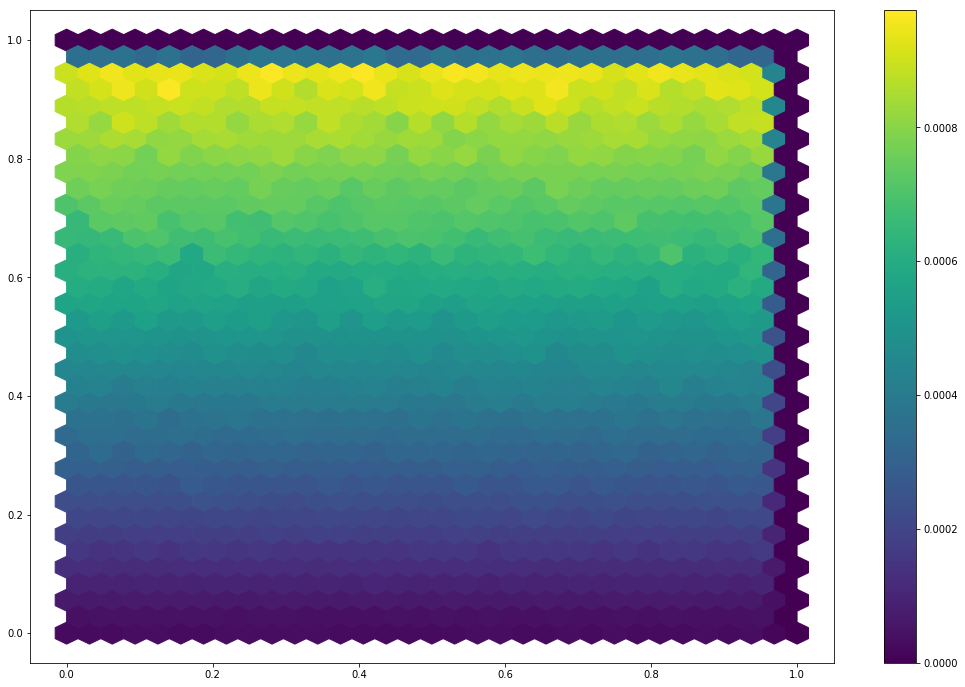

In [11]:
plt.hexbin(dist[:,0], dist[:,1], weights_xy_y, gridsize=n_bins, extent = [0.0, 1.0, 0.0, 1.0])
plt.colorbar();

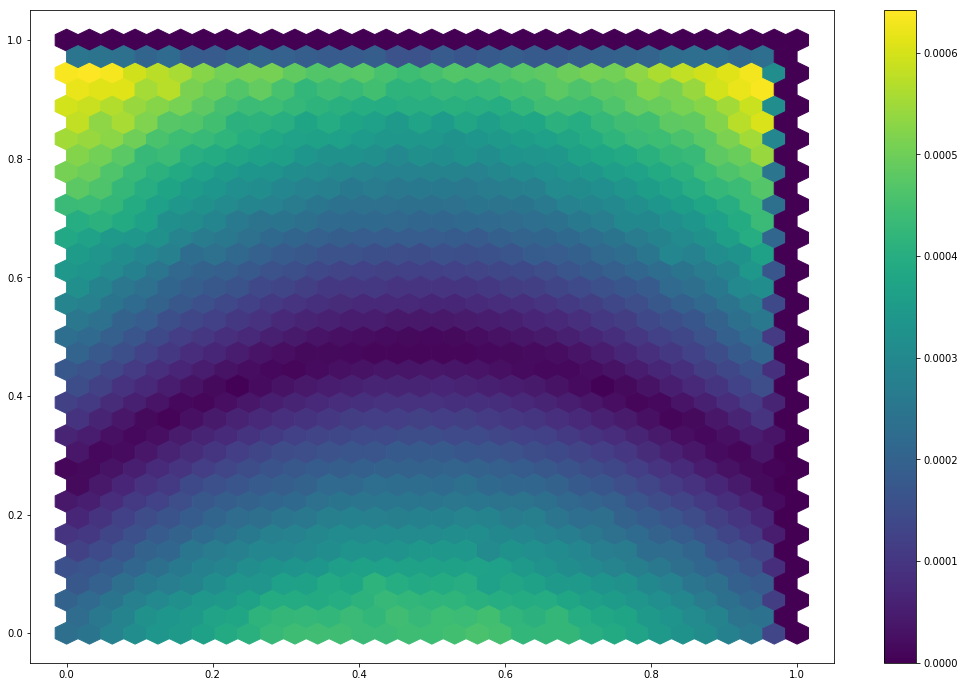

In [12]:
plt.hexbin(dist[:,0], dist[:,1], weights_xy_normal, gridsize=n_bins, extent = [0.0, 1.0, 0.0, 1.0])
plt.colorbar();

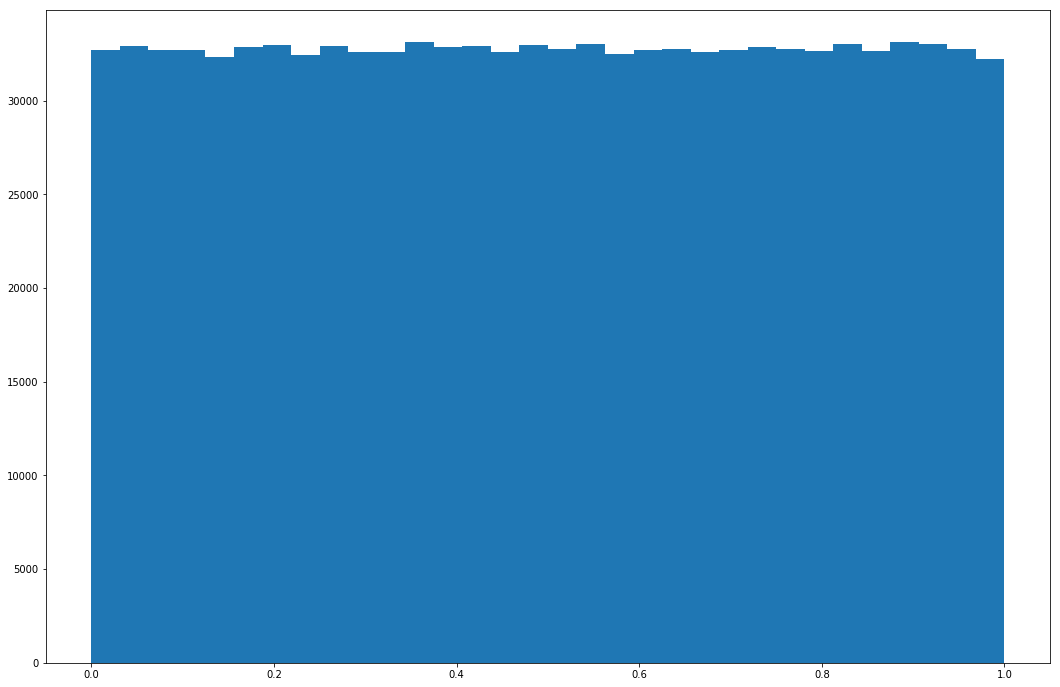

In [13]:
plt.hist(dist[:,0], bins=32, range = [0.0, 1.0]);

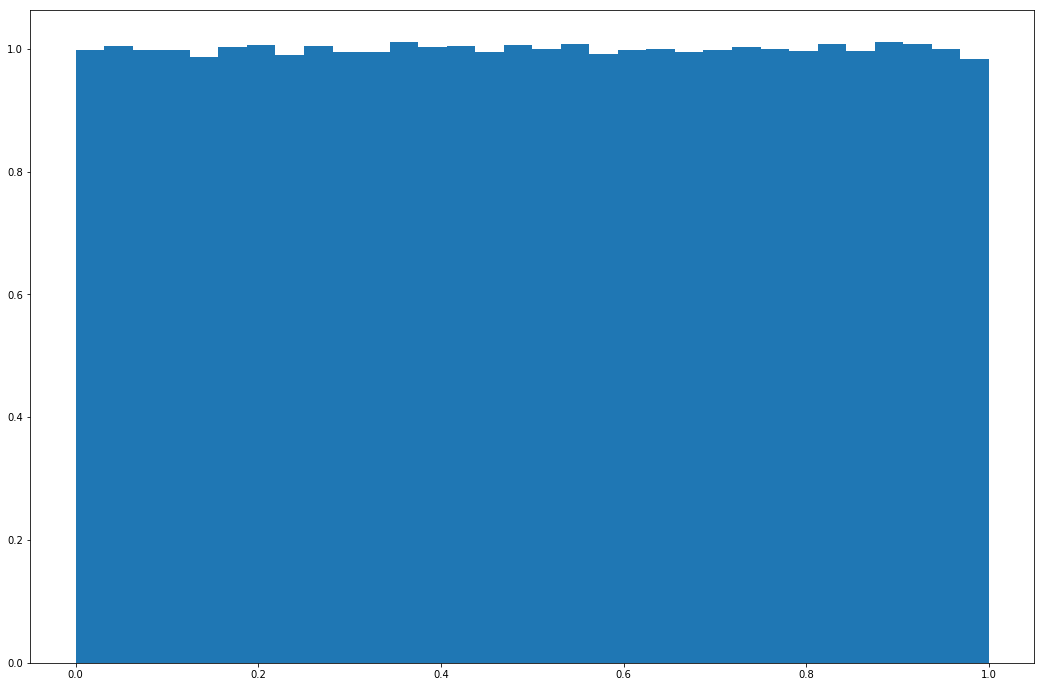

In [14]:
plt.hist(dist[:,0], bins=32, range = [0.0, 1.0], normed=True);

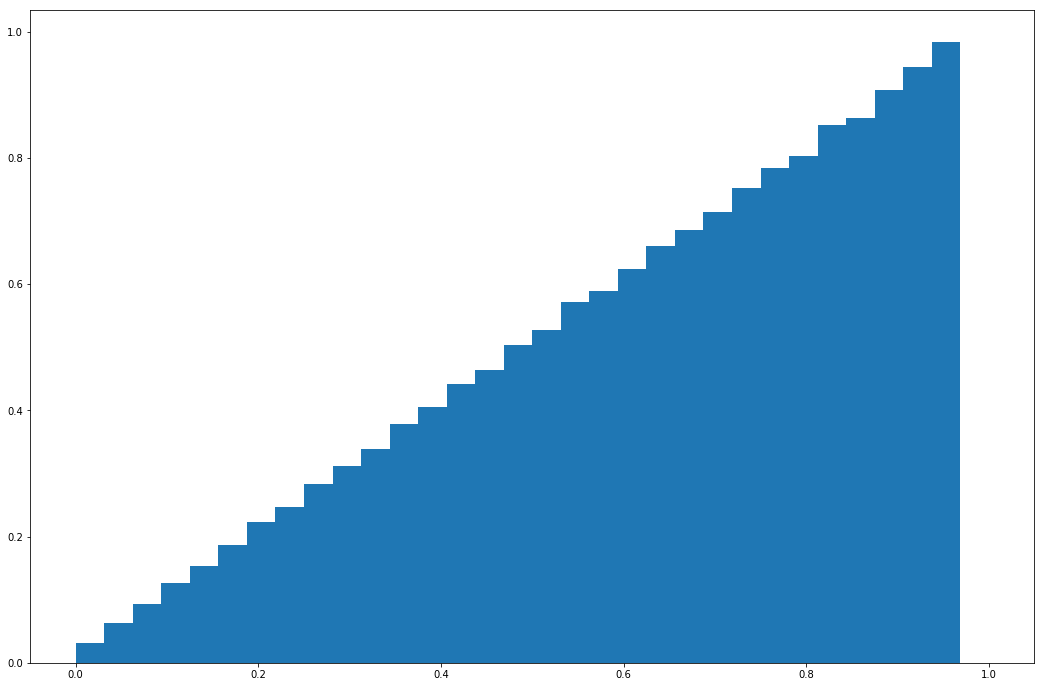

In [15]:
plt.hist(dist[:,0], weights=weights_x, bins=32);

(array([ 105027.,  104478.,  104687.,  105128.,  105066.,  419596.,  104594.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.9,  1. ]),
 <a list of 7 Patch objects>)

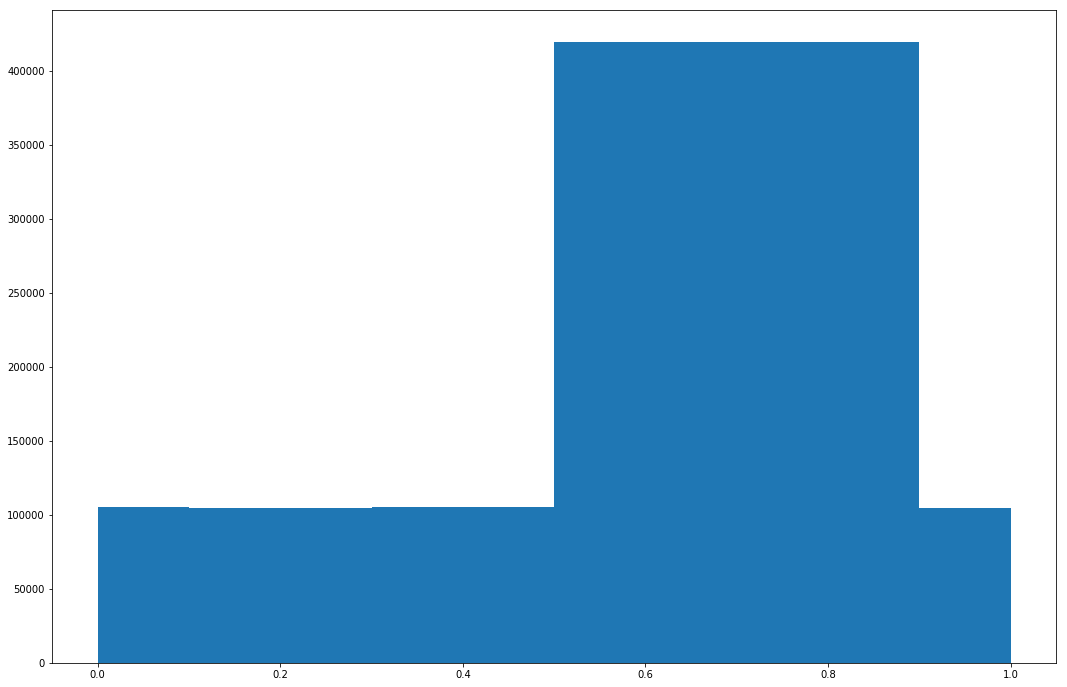

In [16]:
plt.hist(dist[:,0], bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 1.0])

(array([ 0.21346   ,  0.53038476,  0.85089315,  1.16646122,  1.48936755,
         9.15753708,  2.10849874]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.9,  1. ]),
 <a list of 7 Patch objects>)

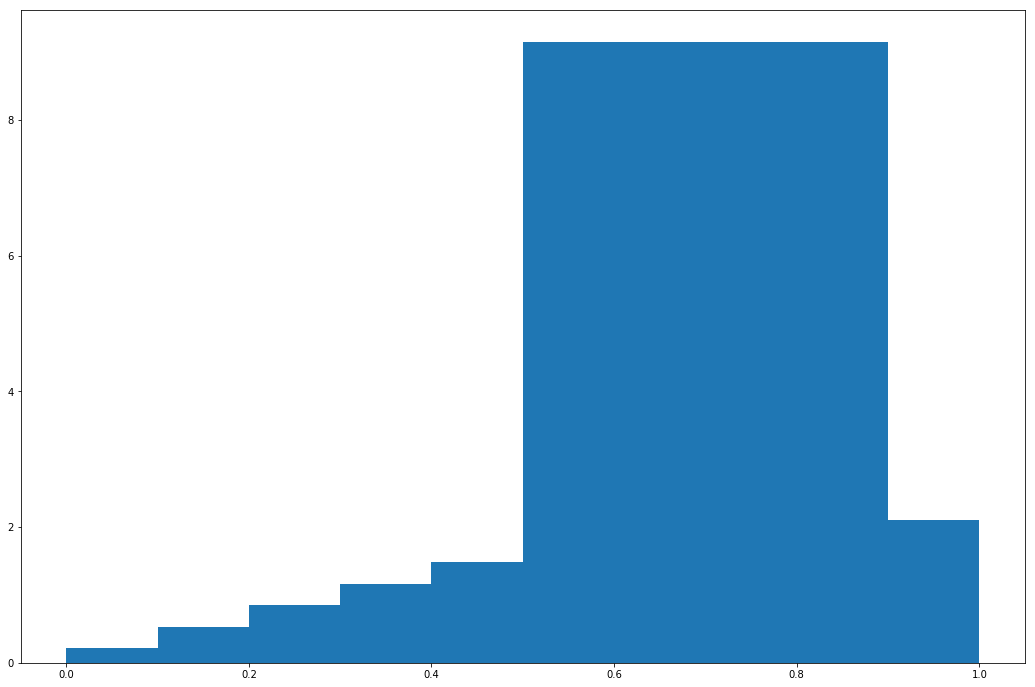

In [17]:
plt.hist(dist[:,0], weights = weights_x, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 1.0])

In [18]:
import h5py
with h5py.File("histogram_data.h5", "w") as f:
    f.create_dataset("/dist", data = dist)
    f.create_dataset("/weights_x", data = weights_x)
    f.create_dataset("/weights_y", data = weights_y)
    f.create_dataset("/weights_xy_x", data = weights_xy_x)
    f.create_dataset("/weights_xy_y", data = weights_xy_y)
    f.create_dataset("/weights_xy_normal", data = weights_xy_normal)

In [19]:
plt.hexbin?

In [20]:
fig = plt.gcf()

In [21]:
fig.add_axes?